In [2]:
from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym

In [3]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "_id":0}   <---- current one
myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "n_b_written":1, "w_r_d":1, "_id":0}

mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)
#mydocSMARTAtt = mycol.find(myquerySMARTAtt)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# %%
dfSMARTAtt["model_y"] = "B2"

# %%
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [3]:
## Saving spllited values into a csv file

model= "B2"

result.to_csv('SplittedDatasetSSD/' + 'extractedattributes' + model + '.csv')

In [2]:
# %%
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["OverTimeSSDsFailures"]
mycol = mydb["over_time_s_s_ds_failures"]

myqueryFailureTime = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
myfieldsFailureTime = {"disk_id":1, "failure_time":1, "_id":0}

mydocFailureTime = mycol.find(myqueryFailureTime, myfieldsFailureTime)

# %%
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listFailureTime = list(mydocFailureTime)
dfFailureTime =  pd.DataFrame(listFailureTime)

# %%
dfFailureTime["model_y"] = "B2"

# %%
resultSSDFailures = pd.merge(dfFailureTime, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving spllited values into a csv file

model= "B2"

resultSSDFailures.to_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [4]:
# Wheter it is necessary to load the files created above

model= "B2"

result = pd.read_csv('../../../../Downloads/' + 'extractedattributes' + model + '.csv')
resultSSDFailures = pd.read_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [4]:
result.head()

,Unnamed: 0.1,Unnamed: 0,disk_id,timestamp,r_sectors,n_b_written,w_r_d,model_y,app
0,0,0,19207.0,2018-01-01,NaN,NaN,NaN,B2,none
1,1,1,19207.0,2018-01-02,NaN,NaN,NaN,B2,none
2,2,2,19207.0,2018-01-03,0.0,5.084690e+09,3.0,B2,none
3,3,3,19207.0,2018-01-04,0.0,5.084690e+09,3.0,B2,none
4,4,4,19207.0,2018-01-05,0.0,5.084690e+09,3.0,B2,none


In [7]:
result.w_r_d.max()

7206.0

In [8]:
# REMOVE ZERO VALUES AS THEY ARE AFFECTING THE KDE RESULTS

result.drop(result[result.w_r_d < 10].index, inplace=True)
result.drop(result[result.w_r_d > 7206].index, inplace=True)

In [9]:
result.drop(result[result.w_r_d > 3000].index, inplace=True)

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

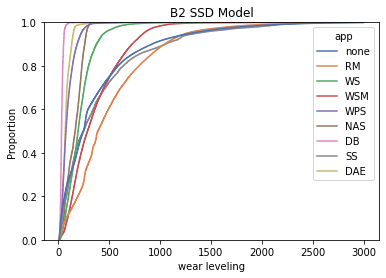

In [7]:
graph = sns.ecdfplot(x = "w_r_d", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel ="wear leveling", title ='B2 SSD Model')

In [ ]:
result.drop(result[result.r_errors < 10].index, inplace=True)

[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

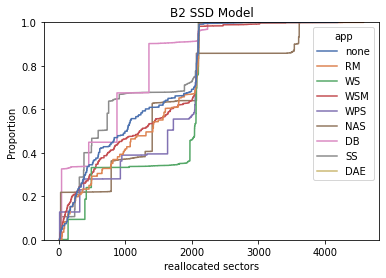

In [11]:
# removing < 10

graph = sns.ecdfplot(x = "r_sectors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

In [ ]:
result.loc[result["app"] == "WS", "u_errors"].max()

In [ ]:
result.drop(result[result.u_errors < 1].index, inplace=True)

[Text(0.5, 0, 'Uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

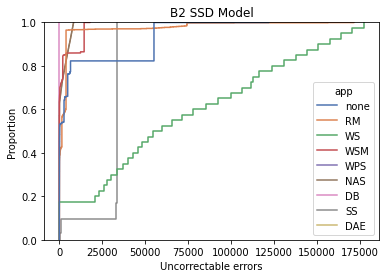

In [14]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

graph = sns.ecdfplot(x = "u_errors", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Uncorrectable errors", title ='B2 SSD Model')

In [18]:
result.loc[result["app"] == "DB", "p_failedB"].max()

2095.0

In [5]:
result.drop(result[result.p_failedB < 1].index, inplace=True)
result.drop(result[result.p_failedB >2103].index, inplace=True)

[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

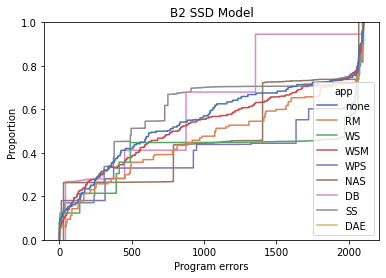

In [16]:
graph = sns.ecdfplot(x = "p_failedB", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

In [2]:
maxW = result.n_b_written.max()

In [3]:
result.drop(result[result.n_b_written < 1].index, inplace=True)
result.drop(result[result.n_b_written > maxW].index, inplace=True)

In [9]:
result.drop(result[result.n_b_written > 5992942384941].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

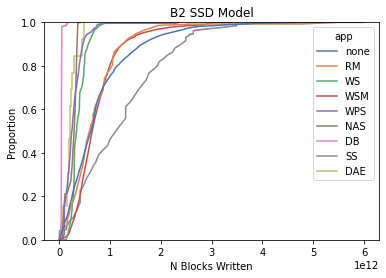

In [10]:
graph = sns.ecdfplot(x = "n_b_written", palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = result)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'wear leveling'), Text(0.5, 1.0, 'B2 SSD Model')]

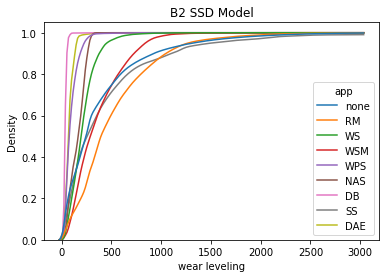

In [8]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="w_r_d", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "wear leveling", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'reallocated sectors'), Text(0.5, 1.0, 'B2 SSD Model')]

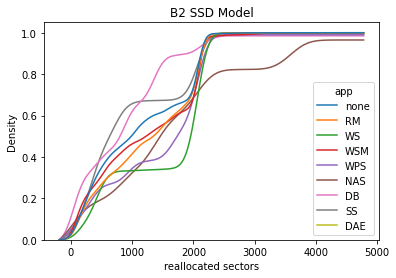

In [13]:
# removing < 10
graph = sns.kdeplot(
    data=result, x="r_sectors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)
graph.set(xlabel = "reallocated sectors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'uncorrectable errors'), Text(0.5, 1.0, 'B2 SSD Model')]

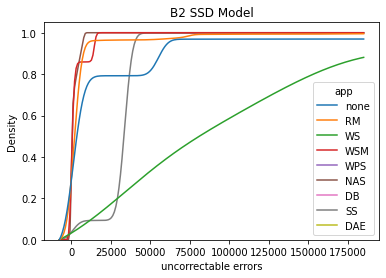

In [15]:
graph = sns.kdeplot(
    data=result, x="u_errors", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "uncorrectable errors", title ='B2 SSD Model')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'Program errors'), Text(0.5, 1.0, 'B2 SSD Model')]

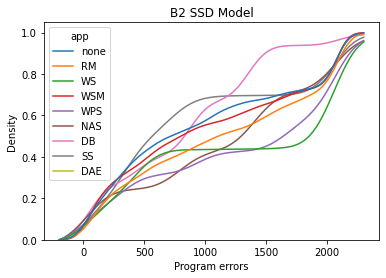

In [19]:
graph = sns.kdeplot(
    data=result, x="p_failedB", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "Program errors", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

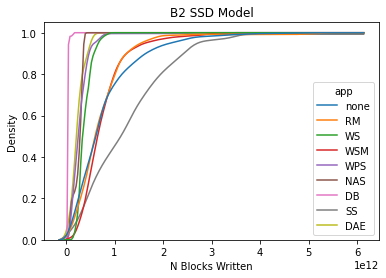

In [11]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

[Text(0.5, 0, 'N Blocks Written'), Text(0.5, 1.0, 'B2 SSD Model')]

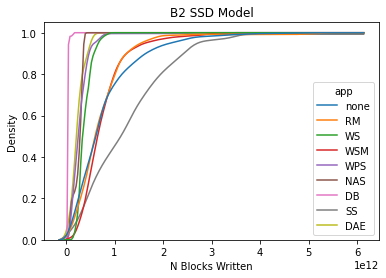

In [7]:
graph = sns.kdeplot(
    data=result, x="n_b_written", hue="app",
    cumulative=True, common_norm=False, common_grid=True,
)

graph.set(xlabel = "N Blocks Written", title ='B2 SSD Model')

### APPROACH USING GROUPY BASED ON TIMESTAMP

N Blocks written x Program Errors

In [ ]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['p_failedB', 'n_b_written'].mean()

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Program errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

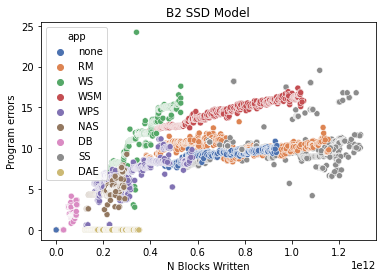

In [9]:
graph = sns.scatterplot(x = "n_b_written", y = 'p_failedB', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

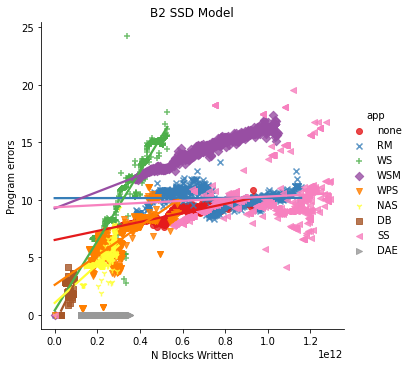

In [11]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

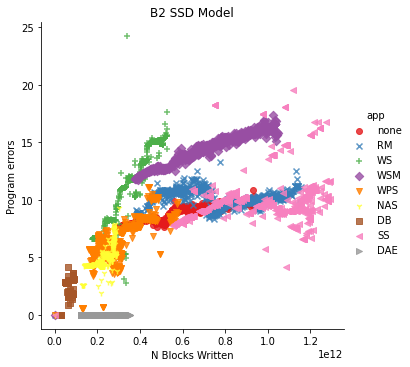

In [12]:
graph = sns.lmplot(x="n_b_written", y="p_failedB", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Program errors", title ='B2 SSD Model')

Wear Leveling x Time

In [4]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['w_r_d'].mean()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

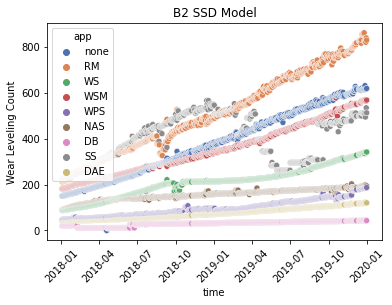

In [6]:
graph = sns.scatterplot(x = "timestamp", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Wear Leveling Count", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Wear Leveling

In [8]:
## group per day (daily mean) - per app

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_70091/52250810.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'w_r_d'].mean()


In [9]:
result.head()

,Unnamed: 0.1,Unnamed: 0,disk_id,timestamp,r_sectors,n_b_written,w_r_d,model_y,app
0,0,0,19207.0,2018-01-01,NaN,NaN,NaN,B2,none
1,1,1,19207.0,2018-01-02,NaN,NaN,NaN,B2,none
2,2,2,19207.0,2018-01-03,0.0,5.084690e+09,3.0,B2,none
3,3,3,19207.0,2018-01-04,0.0,5.084690e+09,3.0,B2,none
4,4,4,19207.0,2018-01-05,0.0,5.084690e+09,3.0,B2,none


In [7]:
## group per day (daily mean) - withou consider app

group = result.groupby(['timestamp'], as_index=False)['n_b_written', 'w_r_d'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_70091/551114079.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp'], as_index=False)['n_b_written', 'w_r_d'].mean()


In [19]:
group.head()

,timestamp,n_b_written,w_r_d
0,2018-01-01,NaN,NaN
1,2018-01-02,NaN,NaN
2,2018-01-03,3.488334e+11,174.343061
3,2018-01-04,3.496710e+11,174.911881
4,2018-01-05,3.507363e+11,175.607019


[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Wear Leveling Count'),
 Text(0.5, 1.0, 'B2 SSD Model')]

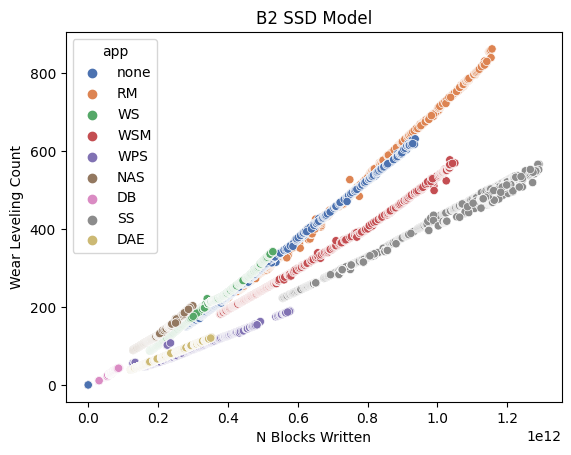

In [10]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

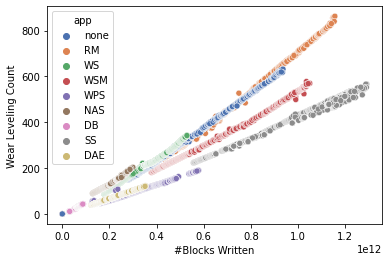

In [7]:
graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Wear Leveling Count")
plt.savefig('img/wearlevelingWritenBlocks.pdf')

In [6]:
group.drop(group[group.w_r_d < 3.25].index, inplace=True)

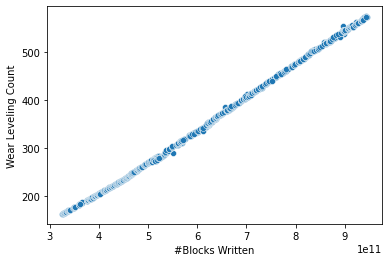

In [7]:
# without consider app

graph = sns.scatterplot(x = "n_b_written", y = 'w_r_d', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Wear Leveling Count")
plt.savefig('img/wearlevelingWritenBlocksWithoutApp.pdf')

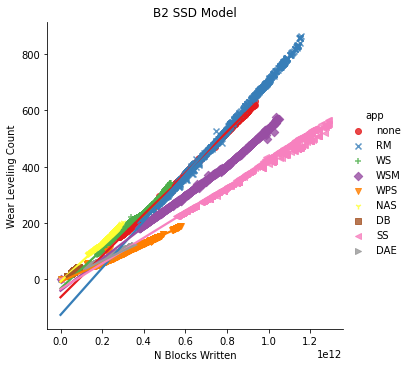

In [5]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

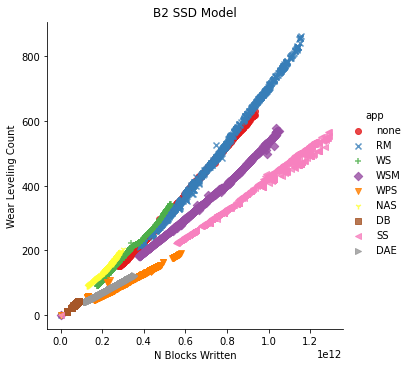

In [6]:
graph = sns.lmplot(x="n_b_written", y="w_r_d", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Wear Leveling Count", title ='B2 SSD Model')

Reallocated Sector x Time

In [3]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['r_sectors'].mean()

In [8]:
group.drop(group[group.r_sectors < 10].index, inplace=True)

In [12]:
group.drop(group[group.r_sectors > 18].index, inplace=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

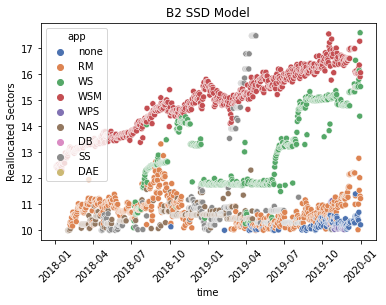

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "Reallocated Sectors", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

N Blocks written x Reallocated sector

In [11]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_70091/3296507595.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'r_sectors'].mean()


In [13]:
group.drop(group[group.r_sectors > 30].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Reallocated Sectors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

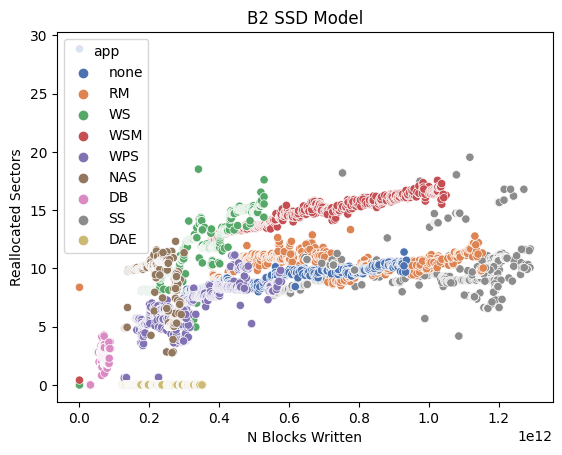

In [14]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

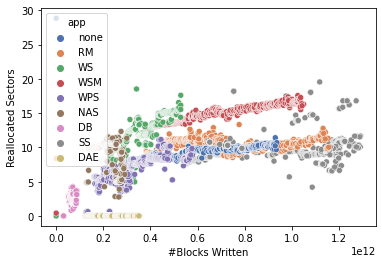

In [24]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Reallocated Sectors")
plt.savefig('img/RSWritenBlocks.pdf')

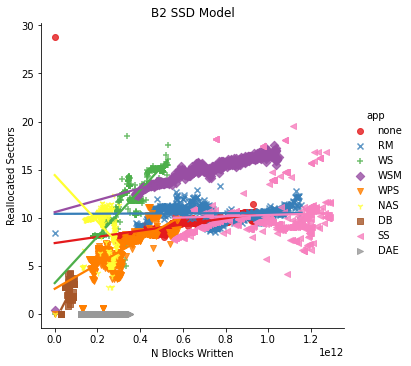

In [8]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

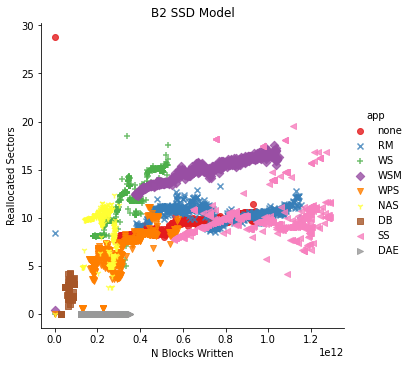

In [9]:
graph = sns.lmplot(x="n_b_written", y="r_sectors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Reallocated Sectors", title ='B2 SSD Model')

N Blocks written x Uncorrectable Errors

In [2]:
result.drop(result[result.u_errors < 1].index, inplace=True)

In [3]:
result.drop(result[result.u_errors > 181184].index, inplace=True)

[Text(0.5, 0, 'N Blocks Written'),
 Text(0, 0.5, 'Uncorrectable Errors'),
 Text(0.5, 1.0, 'B2 SSD Model')]

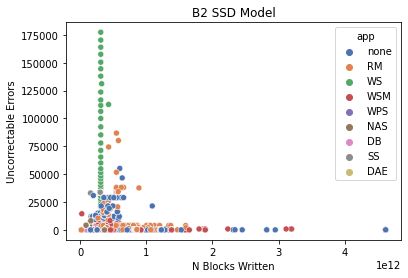

In [5]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Errors", title ='B2 SSD Model')

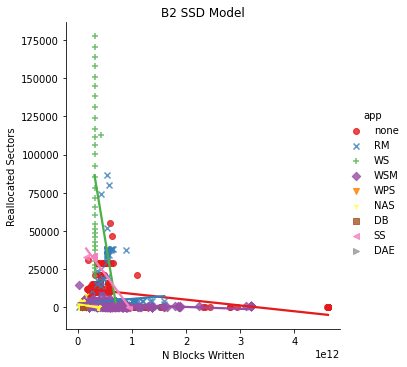

In [6]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=True)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

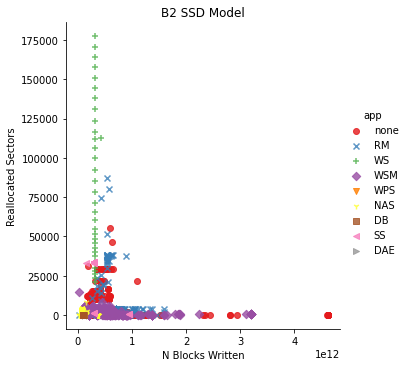

In [7]:
graph = sns.lmplot(x="n_b_written", y="u_errors", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=group, markers=["o", "x", "+", "D", "v", "1", "s", "<", ">"], palette="Set1",x_ci="ci", ci=None, fit_reg=False)
graph.set(xlabel ="N Blocks Written", ylabel = "Uncorrectable Sectors", title ='B2 SSD Model')

In [12]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors'].mean()

/tmp/ipykernel_81299/2965906918.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written', 'u_errors', 'unc_write'].sum()


In [8]:
result["unc_write"] = result["u_errors"]/(result["n_b_written"]*524288)

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Uncorrectable Errors/N Blocks Written'),
 Text(0.5, 1.0, 'B2 SSD Model')]

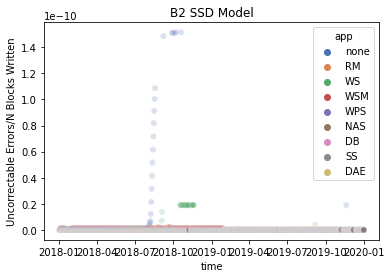

In [13]:
graph = sns.scatterplot(x = "timestamp", y = 'unc_write', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group, alpha=0.2)
graph.set(xlabel ="time", ylabel = "Uncorrectable Errors/N Blocks Written", title ='B2 SSD Model')

N Blocks written x Time

In [2]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

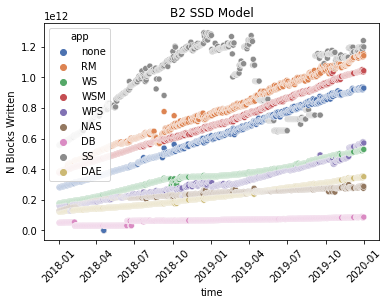

In [9]:
graph = sns.scatterplot(y = "n_b_written", x = 'timestamp', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = group)
graph.set(xlabel ="time", ylabel = "N Blocks Written", title ='B2 SSD Model')

#graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.setp(graph.get_xticklabels(), rotation=45)

 SSDs Failure Time

In [3]:
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')

In [4]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [5]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

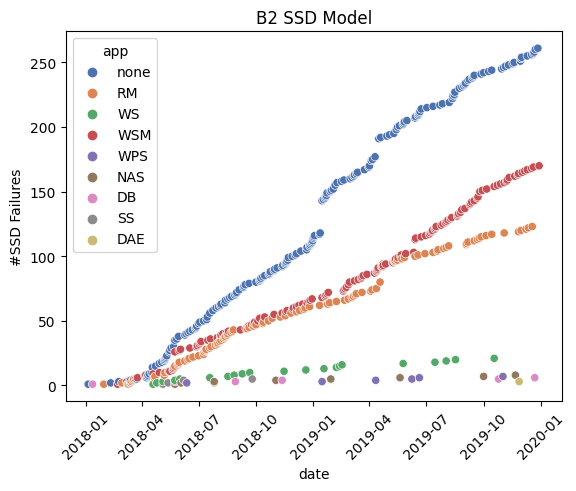

In [6]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')
plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

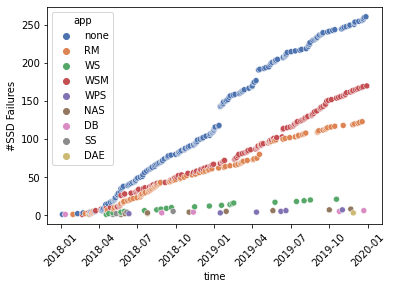

In [43]:
graph = sns.scatterplot(x = "date", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = groupSSDFailures)
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeScatter.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

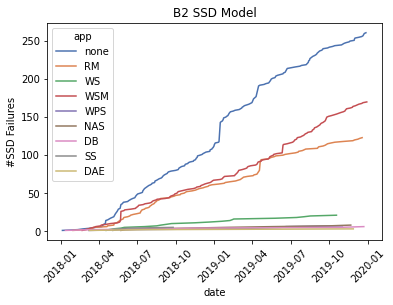

In [95]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="date", ylabel = "#SSD Failures", title ='B2 SSD Model')

plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

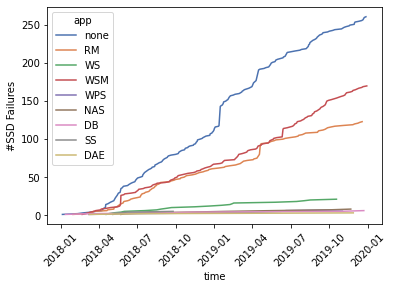

In [44]:
graph = sns.lineplot(x="date", y="cum_sum", hue="app", hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'],data=groupSSDFailures, palette="deep")
graph.set(xlabel ="time", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresTimeLine.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


N Blocks written x SSDs Failures

In [43]:
resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d').dt.floor('D')

In [44]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [45]:
groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

In [46]:
groupSSDFailures.rename(columns = {'date':'timestamp'}, inplace=True)

In [47]:
result['timestamp'] = pd.to_datetime(result['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [61]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()
#group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written']

In [62]:
resultWriteFailure = pd.merge(group, groupSSDFailures, on=['timestamp', 'app'], how='left')

In [44]:
resultWriteFailure.head()

,timestamp,app,n_b_written,disk_id,cum_sum
0,2018-01-01,RM,NaN,NaN,NaN
1,2018-01-01,WS,NaN,NaN,NaN
2,2018-01-01,none,NaN,NaN,NaN
3,2018-01-02,DAE,NaN,NaN,NaN
4,2018-01-02,DB,NaN,NaN,NaN


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, '#SSD Failures')]

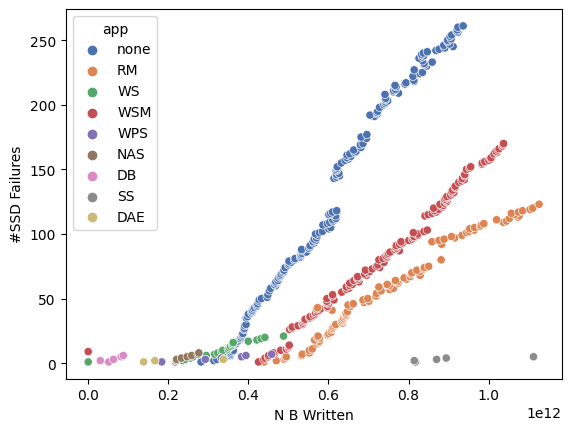

In [63]:
graph = sns.scatterplot(x = "n_b_written", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = resultWriteFailure)
graph.set(xlabel ="N B Written", ylabel = "#SSD Failures")
#plt.setp(graph.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

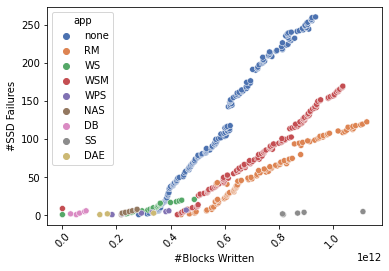

: 

In [ ]:
graph = sns.scatterplot(x = "n_b_written", y = 'cum_sum', palette = 'deep', hue='app', hue_order=['none','RM','WS','WSM', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], data = resultWriteFailure)
graph.set(xlabel ="#Blocks Written", ylabel = "#SSD Failures")
plt.savefig('img/SSDFailuresWritenBlocks.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


In [70]:
# creating datafram to extract values per app for prediction

resultWriteFailureNone = resultWriteFailure.loc[resultWriteFailure.app.isin(["none"])] 
resultWriteFailureWSM = resultWriteFailure.loc[resultWriteFailure.app.isin(["WSM"])] 
resultWriteFailureRM = resultWriteFailure.loc[resultWriteFailure.app.isin(["RM"])] 

In [71]:
resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
resultWriteFailureRM["disk_id"] = resultWriteFailureRM["disk_id"].fillna(0)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3639280157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3639280157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3639280157.py:3: SettingWithCopyW

In [118]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [ ]:
resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
resultWriteFailureRM['cum_sum'] = resultWriteFailureRM.disk_id.cumsum()

In [87]:
resultWriteFailureNone.tail(50)

,timestamp,app,n_b_written,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
5994,2019-11-03,none,8.969865e+11,0.0,243.0,0.008839,991081.646091,1357.646091,41295.068587,2.757202
6003,2019-11-04,none,8.856287e+11,0.0,243.0,0.008826,992560.872428,1359.672428,41356.703018,2.761317
6012,2019-11-05,none,9.024248e+11,1.0,244.0,0.008849,989966.163934,1356.118033,41248.590164,2.754098
6021,2019-11-06,none,8.831379e+11,0.0,244.0,0.008836,991372.211749,1358.044126,41307.17549,2.758197
6030,2019-11-07,none,8.869173e+11,0.0,244.0,0.008823,992845.275956,1360.062022,41368.553165,2.762295
6039,2019-11-08,none,8.852290e+11,0.0,244.0,0.00881,994318.340164,1362.079918,41429.93084,2.766393
6048,2019-11-13,none,8.928558e+11,0.0,244.0,0.008745,1001683.661202,1372.169399,41736.819217,2.786885
6057,2019-11-14,none,8.913520e+11,0.0,244.0,0.008732,1003156.72541,1374.187295,41798.196892,2.790984
6066,2019-11-15,none,8.953776e+11,0.0,244.0,0.00872,1004629.789617,1376.205191,41859.574567,2.795082
6075,2019-11-16,none,8.934298e+11,0.0,244.0,0.008707,1006102.853825,1378.223087,41920.952243,2.79918


In [85]:
#dynamic mttf - app(None)

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureNone.size

resultWriteFailureNone["AFR_SSDs"] = " "
resultWriteFailureNone["mttf_SDDs"] = " "
resultWriteFailureNone["MTTFMes_SSDs"] = " "
resultWriteFailureNone["MTTFDia_SSDs"] = " "
resultWriteFailureNone["MTTFTest_SSDs"] = " "

for i in range(0, len(resultWriteFailureNone)): 
    

    numberFailedSSDs = resultWriteFailureNone.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(15015-resultWriteFailureNone.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
        MTTFTest_SSDs = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/numberFailedSSDs
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0
        MTTFTest_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs
    
    # converting to string for saving as a csv
    #resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureNone.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','
    #resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = str(MTTFTest_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureNone.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs
    resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = MTTFTest_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/4023182073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/4023182073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/4023182073.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [39]:
resultWriteFailureNone.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/2093885582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone.fillna(0, inplace=True)


In [40]:
resultWriteFailureNone.tail(100)

,timestamp,app,n_b_written,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
5544,2019-09-14,none,8.364111e+11,0.0,235.0,0.009232,948855.035461,1299.801418,39535.626478,2.638298
5553,2019-09-15,none,8.324314e+11,1.0,236.0,0.009257,946358.389831,1296.381356,39431.599576,2.631356
5562,2019-09-16,none,8.368280e+11,1.0,237.0,0.009281,943818.950774,1292.902672,39325.789616,2.624473
5571,2019-09-17,none,8.753159e+11,0.0,237.0,0.009267,945272.379747,1294.893671,39386.349156,2.628692
5580,2019-09-18,none,8.645079e+11,0.0,237.0,0.009252,946789.670886,1296.972152,39449.56962,2.632911
...,...,...,...,...,...,...,...,...,...,...
6399,2019-12-27,none,9.362144e+11,1.0,256.0,0.008624,1015749.375,1391.4375,42322.890625,2.828125
6408,2019-12-28,none,9.194166e+11,0.0,256.0,0.008613,1017083.43099,1393.264974,42378.476291,2.832031
6417,2019-12-29,none,9.253141e+11,0.0,256.0,0.008601,1018486.304687,1395.186719,42436.929362,2.835938
6426,2019-12-30,none,9.337833e+11,0.0,256.0,0.008589,1019889.178385,1397.108464,42495.382433,2.839844


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/2916875340.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'MTTF (h)')]

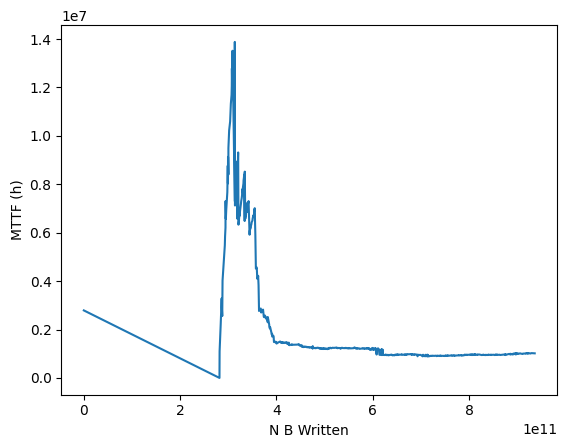

In [76]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="N B Written", ylabel = "MTTF (h)")
#plt.setp(graph.get_xticklabels(), rotation=45)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/410778016.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'AFR')]

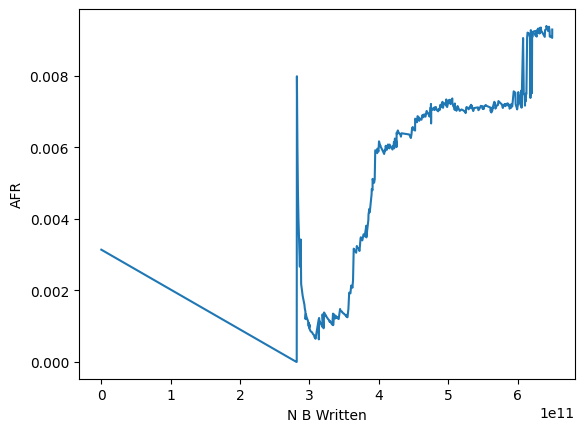

In [90]:
graph = sns.lineplot(x = "n_b_written", y = 'AFR_SSDs', palette = 'deep', data = resultWriteFailureNone)
graph.set(xlabel ="N B Written", ylabel = "AFR")
#plt.setp(graph.get_xticklabels(), rotation=45)

In [94]:
#In case it is necessary drop out some values (e.g., weird patterns)

resultWriteFailureNone.drop(resultWriteFailureNone[resultWriteFailureNone.n_b_written > (4.5*(10**11))].index, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/4003267430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureNone.drop(resultWriteFailureNone[resultWriteFailureNone.n_b_written > (4.5*(10**11))].index, inplace=True)


In [98]:
resultWriteFailureNone.tail()

,timestamp,app,n_b_written,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs,MTTFTest_SSDs
1737,2018-07-13,none,4.461321e+11,0.0,50.0,0.006265,1398329.6,1915.52,58263.733333,3.84
1746,2018-07-14,none,4.469745e+11,1.0,51.0,0.006357,1378051.535948,1887.74183,57418.813998,3.784314
1755,2018-07-15,none,4.488624e+11,2.0,53.0,0.006572,1332831.245283,1825.796226,55534.63522,3.660377
1764,2018-07-16,none,4.479431e+11,0.0,53.0,0.00654,1339522.45283,1834.962264,55813.435535,3.679245
1773,2018-07-17,none,4.495051e+11,0.0,53.0,0.006506,1346391.798742,1844.372327,56099.658281,3.698113


In [95]:
resultWriteFailureNoneValues = pd.DataFrame(resultWriteFailureNone, columns=["n_b_written", "AFR_SSDs"])
resultWriteFailureNoneValues = resultWriteFailureNoneValues.values

In [96]:
X, y = resultWriteFailureNoneValues[:, :-1], resultWriteFailureNoneValues[:, -1]

In [100]:
# trying to use xgboost to make predicitions
import math
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


# fit model
model.fit(X, y)
# define new data
row = [15*(10**11)]
new_data = np.asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)


Mean MAE: 0.000 (0.000)
Predicted: 0.006


In [78]:
#dynamic mttf - RM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureRM.size

resultWriteFailureRM["AFR_SSDs"] = " "
resultWriteFailureRM["mttf_SDDs"] = " "
resultWriteFailureRM["MTTFMes_SSDs"] = " "
resultWriteFailureRM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureRM)): 
    

    numberFailedSSDs = resultWriteFailureRM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureRM.timestamp.iloc[i] - resultWriteFailureRM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(8015-resultWriteFailureRM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureRM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureRM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3960862930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["AFR_SSDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3960862930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM["mttf_SDDs"] = " "
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3960862930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [115]:
resultWriteFailureRM.head()

,timestamp,app,n_b_written,disk_id,cum_sum,AFR_SSDs,mttf_SDDs,MTTFMes_SSDs,MTTFDia_SSDs
0,2018-01-01,RM,NaN,0.0,0.0,0,0,0,0
6,2018-01-02,RM,NaN,0.0,0.0,0,0,0,0
15,2018-01-03,RM,3.824297e+11,0.0,0.0,0,0,0,0
24,2018-01-04,RM,3.838148e+11,0.0,0.0,0,0,0,0
33,2018-01-05,RM,3.856599e+11,0.0,0.0,0,0,0,0


In [79]:
resultWriteFailureRM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/1168983232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultWriteFailureRM.fillna(0, inplace=True)


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_13143/3429448514.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'MTTF (h)')]

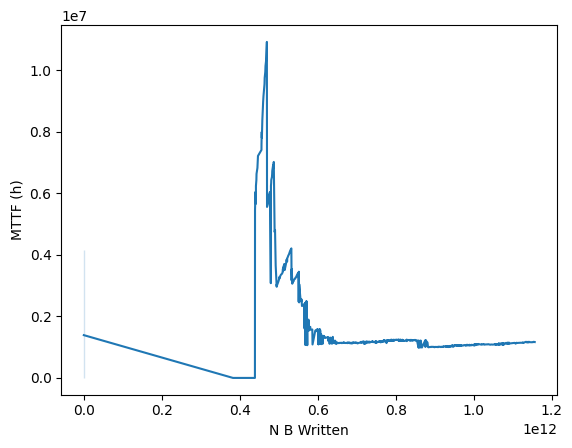

In [80]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureRM)
graph.set(xlabel ="N B Written", ylabel = "MTTF (h)")
#plt.setp(graph.get_xticklabels(), rotation=45)

In [ ]:
#dynamic mttf - WSM

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureWSM.size

resultWriteFailureWSM["AFR_SSDs"] = " "
resultWriteFailureWSM["mttf_SDDs"] = " "
resultWriteFailureWSM["MTTFMes_SSDs"] = " "
resultWriteFailureWSM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureWSM)): 
    

    numberFailedSSDs = resultWriteFailureWSM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureWSM.timestamp.iloc[i] - resultWriteFailureWSM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(18036-resultWriteFailureWSM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs

    # converting to string for saving as a csv
    #resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    #resultWriteFailureWSM.mttf_SDDs.iloc[i] = str(MTTF_SSDs) + ','
    #resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = str(MTTFMes_SSDs) + ','
    #resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = str(MTTFDia_SSDs) + ','

    # keeping the dataframe values as integers (for plotting or to perform some calculation)
    resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureWSM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

In [ ]:
resultWriteFailureWSM.fillna(0, inplace=True)

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_70091/382540897.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)


[Text(0.5, 0, 'N B Written'), Text(0, 0.5, 'MTTF (h)')]

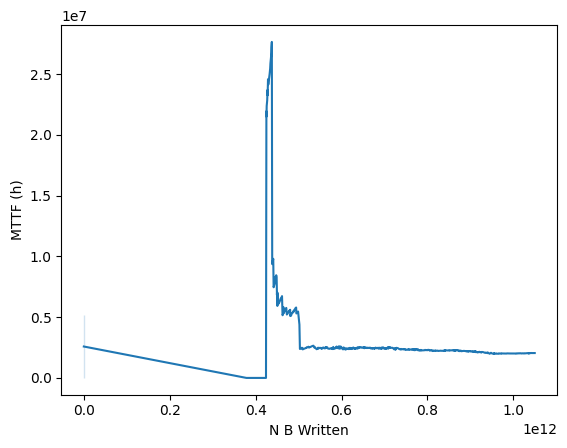

In [124]:
graph = sns.lineplot(x = "n_b_written", y = 'mttf_SDDs', palette = 'deep', data = resultWriteFailureWSM)
graph.set(xlabel ="N B Written", ylabel = "MTTF (h)")
#plt.setp(graph.get_xticklabels(), rotation=45)

In [104]:
print(len(resultWriteFailureNone),len(resultWriteFailureWSM),len(resultWriteFailureRM))

716 715 716


In [106]:
## Saving spllited values (AFR, mttf's) into a csv file

resultWriteFailureNone.to_csv('SplittedDatasetSSD/' + 'extractedMTTFNone'  + '.csv')
#resultWriteFailureWSM.to_csv('SplittedDatasetSSD/' + 'extractedMTTFWSM'  + '.csv')
#resultWriteFailureRM.to_csv('SplittedDatasetSSD/' + 'extractedMTTFRM'  + '.csv')